In [1]:
import csv
import numpy as np
import keras
import datetime

print("start at %s" % datetime.datetime.today())
###
# 1.データ準備
###
print("initializing...")
n = 8500              # 入力層の要素数(=データの最大文字数)
k = 3                 # 出力層の要素数(いくつに分類するか)
X=np.empty((0,n),float) # 学習用入力データの行列
Y=np.empty((0,k),float)  # 学習用出力データの行列
X_test=np.empty((0,n),float) # 評価用入力データの行列
Y_test=np.empty((0,k),float) # 評価用出力データの行列

max_rows = 10000  # 読み取り行数最大
learn_ratio = 0.9 # 読み取ったデータのうち学習に使う比率
learn_rows = max_rows * learn_ratio # 学習に使うデータの行数
print("max_rows=%s" % max_rows)
print("learn_rows=%s" % learn_rows)

print("reading data..")
with open('reviews-ccnn-teacher-data03.txt', 'r') as f:
    reader = csv.reader(f,delimiter = '\t')
#    header = next(reader)  # ヘッダーを読み飛ばしたい時

    for i,row in enumerate(reader):
#        print(i,row[0],row[1])          # 1行づつ取得できる
        if (i+1) % 500 == 0:
            print("%s rows read .. %s" % (i+1,datetime.datetime.today()))
        x=[]
        for c in row[1]:
            x.append(np.int.from_bytes(c.encode('utf-8'),'big'))
        xx = np.array(x)
        xx.resize(n,refcheck=False)
        xx = xx.astype('float32')
        y = float(row[0])
        # 上位learn_rows分を学習データ　それ以外を評価データに使う
        # ホントはシャッフルしたほうがいい
        if i < learn_rows:
            X=np.append(X,[xx],axis=0)
            Y = np.append(Y,keras.utils.np_utils.to_categorical(y, k),axis=0)
        else:
            X_test=np.append(X_test,[xx],axis=0)
            Y_test = np.append(Y_test,keras.utils.np_utils.to_categorical(y, k),axis=0)
        if i > max_rows:
            break

print("total %s rows read" % (i-1) )

# Xを３次元の行列に変換。この意味はわからない・・Kerasの都合か。
X=X.reshape(X.shape[0],n,1)
X_test=X_test.reshape(X_test.shape[0],n,1)
# 正規化
X /= 0x1FFFFF
X_test /= 0x1FFFFF

print("initialized at %s" % datetime.datetime.today())


Using TensorFlow backend.


start at 2018-02-07 17:46:35.746040
initializing...
max_rows=10000
learn_rows=9000.0
reading data..
500 rows read .. 2018-02-07 17:46:43.006805
1000 rows read .. 2018-02-07 17:47:05.322858
1500 rows read .. 2018-02-07 17:47:40.611246
2000 rows read .. 2018-02-07 17:48:29.904426
2500 rows read .. 2018-02-07 17:49:32.607923
3000 rows read .. 2018-02-07 17:50:48.720557
3500 rows read .. 2018-02-07 17:52:18.203879
4000 rows read .. 2018-02-07 17:54:01.454630
4500 rows read .. 2018-02-07 17:55:58.240150
5000 rows read .. 2018-02-07 17:58:08.588942
5500 rows read .. 2018-02-07 18:00:32.411735
6000 rows read .. 2018-02-07 18:03:09.620725
6500 rows read .. 2018-02-07 18:05:59.951167
7000 rows read .. 2018-02-07 18:09:03.912290
7500 rows read .. 2018-02-07 18:12:20.665891
8000 rows read .. 2018-02-07 18:15:50.455261
8500 rows read .. 2018-02-07 18:19:33.853723
9000 rows read .. 2018-02-07 18:23:31.112054
9500 rows read .. 2018-02-07 18:23:34.156863
10000 rows read .. 2018-02-07 18:23:55.462883


In [2]:
# 学習データの件数確認
X.shape

(9000, 8500, 1)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adadelta
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers.core import Dropout
from keras.initializers import TruncatedNormal
from keras.layers import Flatten, Conv1D, MaxPooling1D

###
# 2.モデル設定
###
print("building model start at %s" % datetime.datetime.today())
kernel_size = (3)
model = Sequential()
# 入力層
model.add(Conv1D(10, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=(n,1)
                 )
        )
# 畳み込み層
model.add(Conv1D(20, kernel_size, activation='relu'))
# プーリング層
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
# 出力層
model.add(Dense(k, activation='softmax'))

# 確率的勾配降下法
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

print("model built at %s" % datetime.datetime.today())


building model start at 2018-02-07 18:23:56.388952
model built at 2018-02-07 18:23:56.611402


In [4]:
print("learning model start at %s" % datetime.datetime.today())

###
# 3.モデル学習
###
epochs = 12     # 学習繰り返し数
batch_size = 120
hist = model.fit(X, Y, epochs=epochs, batch_size=batch_size,)
#               validation_data=(X_validation ,Y_validation))

print("learned at %s" % datetime.datetime.today())


learning model start at 2018-02-07 18:23:56.621491
Epoch 1/12
9000/9000 [==============================] - 66s - loss: 0.9260 - acc: 0.5332    
Epoch 2/12
9000/9000 [==============================] - 66s - loss: 0.9059 - acc: 0.5838    
Epoch 3/12
9000/9000 [==============================] - 66s - loss: 0.8884 - acc: 0.5833    
Epoch 4/12
9000/9000 [==============================] - 66s - loss: 0.8853 - acc: 0.5839    
Epoch 5/12
9000/9000 [==============================] - 66s - loss: 0.8764 - acc: 0.5810    
Epoch 6/12
9000/9000 [==============================] - 66s - loss: 0.8634 - acc: 0.5812    
Epoch 7/12
9000/9000 [==============================] - 66s - loss: 0.8498 - acc: 0.5819    
Epoch 8/12
9000/9000 [==============================] - 66s - loss: 0.8440 - acc: 0.5833    
Epoch 9/12
9000/9000 [==============================] - 67s - loss: 0.8370 - acc: 0.5813    
Epoch 10/12
9000/9000 [==============================] - 67s - loss: 0.8265 - acc: 0.5823    
Epoch 11/12
9000/9

In [5]:
###
# 4-1.評価
###
loss_and_metrics = model.evaluate(X_test, Y_test)
print()
print(loss_and_metrics)
# 可視化
val_loss = hist.history['loss']
val_acc = hist.history['acc']
print(val_loss)
print(val_acc)

 992/1002 [============================>.] - ETA: 0s
[0.75002612420422832, 0.52095808395130672]
[0.92603411038716632, 0.90594668308893844, 0.88836114645004272, 0.88533145030339555, 0.87635244448979699, 0.86344993352890009, 0.84984836260477703, 0.84395415862401324, 0.8369843260447184, 0.82648702939351404, 0.82542283217112222, 0.81648220141728722]
[0.53322222113609319, 0.58377777536710107, 0.58333333174387614, 0.58388888875643408, 0.58099999984105433, 0.58122222383817035, 0.58188888708750408, 0.58333333452542624, 0.58133333404858911, 0.5823333354791006, 0.583222219546636, 0.58177777767181393]


In [6]:
###
# 4-2.予測
###

predicted = model.predict(X_test)


In [7]:
# ランダムに１０個ほど予測結果を確認
for i in np.random.randint(0,max_rows-learn_rows,10):
    print(i,Y_test[i],predicted[i])
    # ID化したデータを文字列に戻す
    ss = str()
    for xx in (X_test[i] * 0x1FFFFF).reshape(n).astype(int):
        ixx = int(xx)
        ss += (ixx.to_bytes((ixx.bit_length() + 7) // 8,'big')).decode(encoding='utf-8')

    print(ss)




205 [ 0.  0.  1.] [ 0.0581618   0.47248349  0.46935469]
すごい美味かった。
466 [ 0.  0.  1.] [ 0.02483522  0.42216757  0.55299717]
2015.3.21。用で通った道に偶然、目立つ店。昭島市の青樹に行く予定(仮)が、一緒にいた奴が腹へりで、北斗の拳のラオウなみに問答無用で決めた今回の店。「予定は未定」な旅気分、行きたい店は山ほど、通り道には息つく暇もないほどラーメン店があふれてる。今日のラーメンはどんなかな？  食券機のメニューが瞬時に理解しづらい。丼ぶりを待つ間に反スウ。整理すると、魁花ラーメン(塩・醤油)、魁花つけ麺(塩・醤油)がカマス出汁。昔ながらの中華そば(塩・醤油)、つけそばが鶏ガラ出汁。書けばこうなんだが。 つけ系にＺというのがあり、写真が美味しそうで気になった(つけ麺かつけそばか忘れた)。  魁花つけ麺醤油。煮干し系にたまにある、少し生臭い匂い。えぐみ等はなく味は美味しい。瞬時に以前に食べた焼きカマスを思い出すくらいカマス。写真より麺がよれていて嬉しい。具の、定番ぽい海苔やらも、それぞれがお互いに合ってて旨い。 隣席の別客に「Ｚです」と丼が。ああ、Ｚ！迷ったやつだ。具が盛り盛り。つけ汁がこっちのより、なんというか不透明で茶色っぽく見えた。次回の楽しみということで。  うん、旨かった。
994 [ 0.  1.  0.] [ 0.00295057  0.4027099   0.59433955]
変化進化退化。  長野駅前にある【北海道ラーメン るるも 長野駅前本店】の２号店。 「車で来てもらえる店を」とオープンさせた 、長野の人気店【ら～めん るるも 丹波島店】  モノがものなので先出しだす。  いゃ～４年ぶりの突撃かと。 ごぶゥ～ １３時半ちょい過ぎ、先客１０名、カウンターへ。 平日のランチサービスがある。色々と選択肢はあるのだが「大盛」をチョイス。 因みに他のサービスは「サラダ」とか「餃子」、「ライス」などがあったと思う.. ンで、肝心な主役は３月の「限定」で１日２０食の「数量限定」のモノをイッてみたい。 超久しぶりなので、忘れてしまった基本のモノも気にはなったが「限定」はソレを上回っちゃったのヨ！ 「暮春のおすすめ」で《俺の肉そばシリーズ

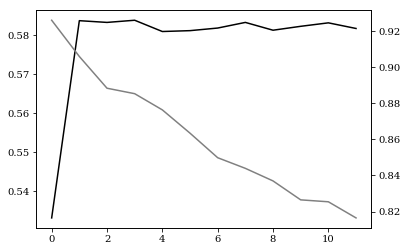

In [8]:
import os

###
# 5.学習の可視化
###

plt.rc('font', family='serif')
fig = plt.figure()
# 精度
ax_acc = fig.add_subplot(111)
ax_acc.plot(range(epochs), val_acc, label='acc', color='black')
# 損失
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epochs), val_loss, label='loss', color='gray')
plt.xlabel('epochs')
#file,ext = os.path.splitext(os.path.basename(__file__))
#plt.savefig(file+'.eps')

plt.show()